In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint
from TestProblems import prey_predator_model, van_der_pol_model, CSTR_3state_model, CSTR_1state_model

# Test simulations for the test problems

## Prey-predator model

In [2]:
# Define time span and initial conditions
t_span = (0, 100)
x0 = [20, 9]  # Example initial conditions for prey and predator populations
a = 0.2  # Prey growth rate
b = 0.04  # Predation rate

f, J = prey_predator_model(a, b)

# Solve using ode45 (method='RK45')
solution_ode45 = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], 500))

# Solve using ode15s (method='LSODA')
solution_ode15s = solve_ivp(f, t_span, x0, method='LSODA', t_eval=np.linspace(t_span[0], t_span[1], 500))

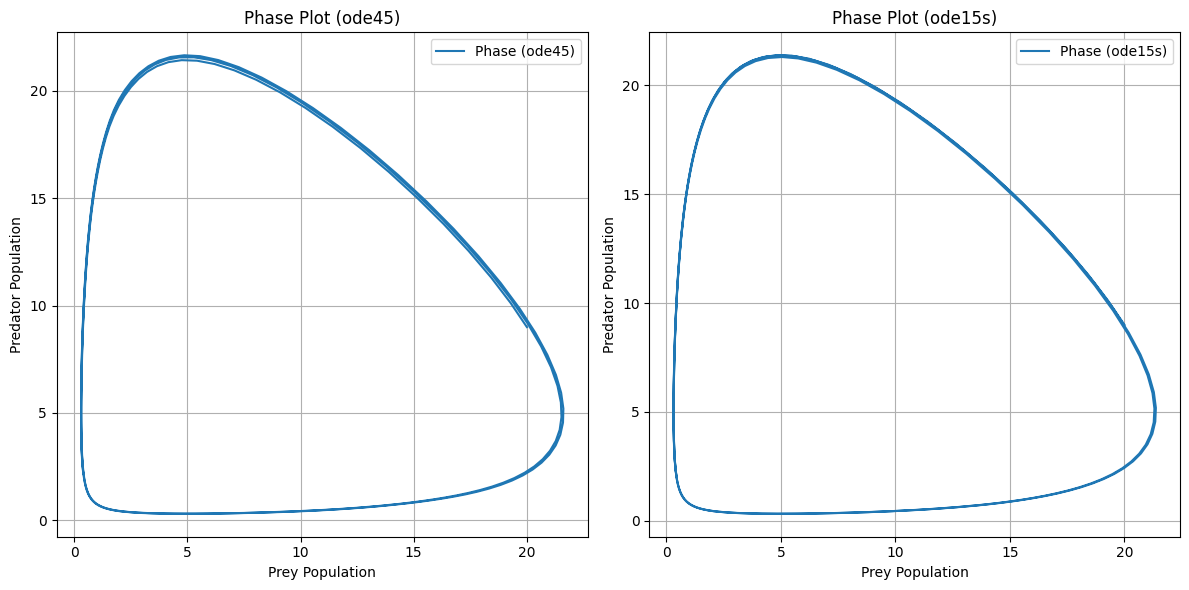

In [3]:
plt.figure(figsize=(12, 6))

# Phase plot for ode45
plt.subplot(1, 2, 1)
plt.plot(solution_ode45.y[0], solution_ode45.y[1], label='Phase (ode45)')
plt.title('Phase Plot (ode45)')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.legend()
plt.grid(True)

# Phase plot for ode15s
plt.subplot(1, 2, 2)
plt.plot(solution_ode15s.y[0], solution_ode15s.y[1], label='Phase (ode15s)')
plt.title('Phase Plot (ode15s)')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Van der Pol model

In [4]:
# Define time span and initial conditions
mu_nonstiff = 1  # Non-stiff
mu_stiff = 100  # Stiff
t_span = (0, 20)
x0 = [2, 0]  # Initial condition

f_stiff, _ = van_der_pol_model(mu_stiff)
f_nonstiff, _ = van_der_pol_model(mu_nonstiff)

# Solve using ode45 (method='RK45')
sol_nonstiff = solve_ivp(f_nonstiff, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], 1000))


sol_stiff = solve_ivp(f_stiff, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], 1000))

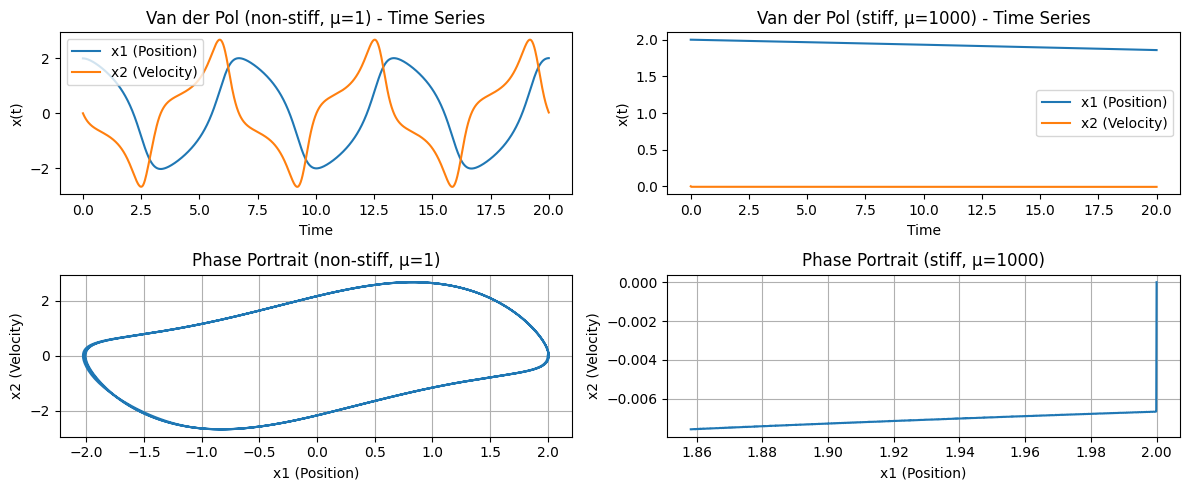

In [5]:
# Plotting time series and phase portraits
plt.figure(figsize=(12, 5))

# Plot time series for non-stiff
plt.subplot(2, 2, 1)
plt.plot(sol_nonstiff.t, sol_nonstiff.y[0], label='x1 (Position)')
plt.plot(sol_nonstiff.t, sol_nonstiff.y[1], label='x2 (Velocity)')
plt.legend()
plt.title('Van der Pol (non-stiff, μ=1) - Time Series')
plt.xlabel('Time')
plt.ylabel('x(t)')

# Plot time series for stiff
plt.subplot(2, 2, 2)
plt.plot(sol_stiff.t, sol_stiff.y[0], label = 'x1 (Position)')
plt.plot(sol_stiff.t, sol_stiff.y[1], label = 'x2 (Velocity)')
plt.legend()
plt.title('Van der Pol (stiff, μ=1000) - Time Series')
plt.xlabel('Time')
plt.ylabel('x(t)')

# Phase portrait for non-stiff
plt.subplot(2, 2, 3)
plt.plot(sol_nonstiff.y[0], sol_nonstiff.y[1], label='Phase (non-stiff, μ=1)')
plt.title('Phase Portrait (non-stiff, μ=1)')
plt.xlabel('x1 (Position)')
plt.ylabel('x2 (Velocity)')
plt.grid(True)

# Phase portrait for stiff
plt.subplot(2, 2, 4)
plt.plot(sol_stiff.y[0], sol_stiff.y[1], label='Phase (stiff, μ=1000)')
plt.title('Phase Portrait (stiff, μ=1000)')
plt.xlabel('x1 (Position)')
plt.ylabel('x2 (Velocity)')
plt.grid(True)

plt.tight_layout()
plt.show()

## CSTR (3 state model)

In [6]:
#Parameters
params = [0.5,0.3,0.1,1.0,10.0]
t_span = (0, 20)
x0 = [1.0, 0.5, 0.2]  # Initial conditions for CSTR model

f, _ = CSTR_3state_model(params)

# Solve using odeint
sol = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], 1000))

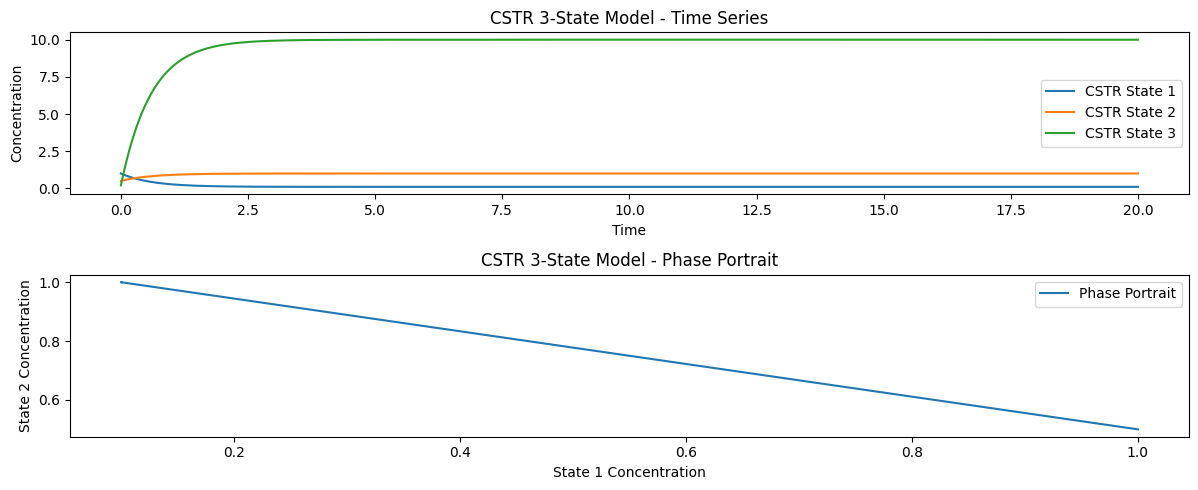

In [7]:
#Plot
plt.figure(figsize=(12, 5))
plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], label='CSTR State 1')
plt.plot(sol.t, sol.y[1], label='CSTR State 2')
plt.plot(sol.t, sol.y[2], label='CSTR State 3')
plt.title('CSTR 3-State Model - Time Series')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(sol.y[0], sol.y[1], label='Phase Portrait')
plt.title('CSTR 3-State Model - Phase Portrait')
plt.xlabel('State 1 Concentration') 
plt.ylabel('State 2 Concentration')
plt.legend()
plt.tight_layout()
plt.show()

## CSTR (1 state model)

In [8]:
#Parameters
params = [0.5,0.3,0.1,1.0,10.0]
t_span = (0, 20)
x0 = [1.0]  # Initial conditions for CSTR model

f, _ = CSTR_1state_model(params)

# Solve using odeint
sol = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], 1000))

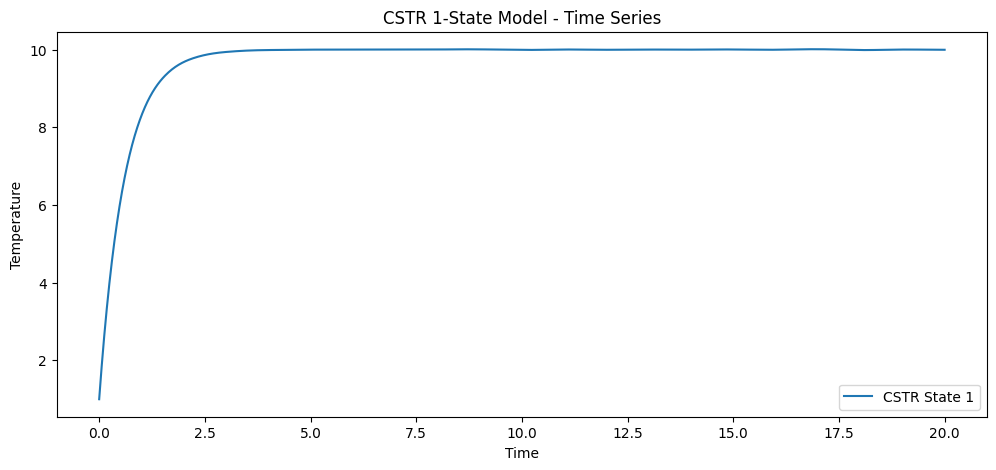

In [11]:
#Plot
plt.figure(figsize=(12, 5))
plt.plot(sol.t, sol.y[0], label='CSTR State 1')
plt.title('CSTR 1-State Model - Time Series')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()